In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import plotly.express as px

In [3]:
df = pd.read_csv('../cleaned-data/pc-clusters.csv', encoding='iso-8859-1', sep="\t", usecols=['COMAX', 'AGE', 'COSEXE', 'CTSCPI'])

In [153]:
insee = pd.read_csv('../data/tj10.csv', encoding='iso-8859-1', sep=";", usecols=['CTSCPI', 'LISCPI'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627710 entries, 0 to 627709
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   COMAX   627710 non-null  object
 1   AGE     627710 non-null  int64 
 2   COSEXE  627710 non-null  int64 
 3   CTSCPI  627710 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 19.2+ MB


In [6]:
df.shape

(627710, 4)

In [7]:
df.columns

Index(['COMAX', 'AGE', 'COSEXE', 'CTSCPI'], dtype='object')

# Analyse une seule variable

## Description AGE

In [35]:
pd.DataFrame(df['AGE'].describe())

,AGE
count,627710.000000
mean,47.600875
std,23.227287
min,0.000000
25%,30.000000
50%,48.000000
75%,65.000000
max,124.000000


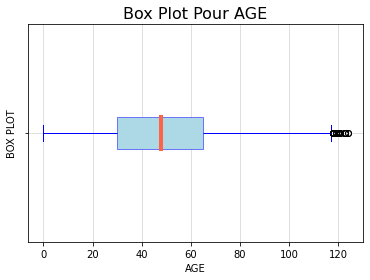

In [146]:
bp = plt.boxplot(df['AGE'], vert=False, patch_artist=True)
plt.yticks([1], [''])

plt.setp(bp['caps'],color='blue',alpha=1)
plt.setp(bp['whiskers'],color='blue',alpha=1)
plt.setp(bp['medians'],color='tomato',alpha=1,linewidth=4.0)
plt.setp(bp['boxes'], color='blue', facecolor='lightblue',alpha=1,linewidth=0.5)

plt.xlabel('AGE')
plt.ylabel('BOX PLOT')
plt.title('Box Plot Pour AGE', fontsize=16)

plt.grid(alpha=0.5)
plt.savefig("../graphs/age_box.svg")

In [133]:
temp = df['AGE'].value_counts(bins=5, normalize=True)
temp = list(zip(temp.index, temp.values))
temp.sort(key=lambda x: x[0])

In [134]:
x = [i[0] for i in temp]
y = [i[1] for i in temp]

In [135]:
x

[Interval(-0.125, 24.8, closed='right'),
 Interval(24.8, 49.6, closed='right'),
 Interval(49.6, 74.4, closed='right'),
 Interval(74.4, 99.2, closed='right'),
 Interval(99.2, 124.0, closed='right')]

In [136]:
y

[0.19555367924678593,
 0.3282949132561215,
 0.3448200602188909,
 0.1267607653215657,
 0.004570581956636026]

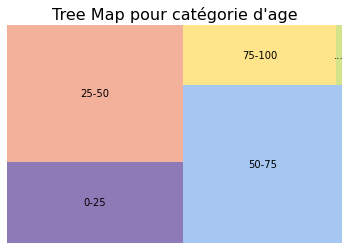

In [149]:
labels = ['0-25', '25-50', '50-75', '75-100', '...']
colors = ['#442288', '#EB7D5B', '#6CA2EA', '#FED23F', '#B5D33D']

squarify.plot(sizes=y, label=labels, color=colors, alpha=0.6 )
plt.axis('off')
plt.title("Tree Map pour catégorie d'age", fontsize=16)
plt.savefig("../graphs/age_tree.svg")

## Description SEXE

In [117]:
# O is for male, and 1 for female
sex = df['COSEXE'].value_counts(normalize=True)

In [57]:
sex.values

array([0.50457536, 0.49542464])

In [58]:
sex.index

Int64Index([0, 1], dtype='int64')

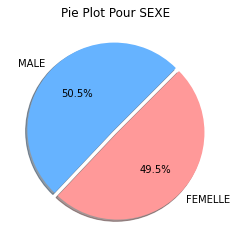

In [80]:
colors = ['#66b3ff', '#ff9999']
labels = ['MALE', 'FEMELLE']
explode = [0.025, 0.025]
plt.pie(sex.values, labels=labels, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=45)

plt.title('Pie Plot Pour SEXE')
plt.savefig("../graphs/sexe.svg")

## Description Code INSEE

In [204]:
temp = pd.DataFrame(df['CTSCPI'].value_counts()).reset_index()
temp.columns = ['CTSCPI', 'COUNT']

In [215]:
def out(insee, code):
    return insee[insee['CTSCPI'] == code]['LISCPI'].values[0].rstrip()

In [216]:
labels = [out(insee, i) for i in temp['CTSCPI'].values]

In [218]:
temp.insert(1, 'LISCPI', labels)

In [231]:
temp

,CTSCPI,LISCPI,COUNT
0,8400,ELEVES ETUDIANTS,109127
1,7600,ANCIENS EMPLOYES ET OUVRIERS,67948
2,8500,INACTIFS DIVERS SAUF RET - 60ANS,46771
3,8600,INACTIFS DIVERS SAUF RET +60ANS,33876
4,5400,EMPLOYES ADMI.ENTREPRISE PRIVEE,33090
5,7300,ANCIENS CADRES PROFESSIONS INTER,31356
6,5200,EMPL CIVILS AGENTS FONCT PUBLIQ,30174
7,5500,EMPLOYES DE COMMERCE,22273
8,2300,CHEFS D'ENTREPRISES,17449
9,4200,INSTITUTEURS ET ASSIMILES,17261


In [227]:
fig = px.treemap(temp, path=['LISCPI'], values='COUNT', color='COUNT')

In [228]:
fig

In [ ]:
fig.write_image("../graphes/CTSCPI.svg")